# Brain Tumor Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

In [16]:
data = keras.utils.image_dataset_from_directory("./input/")

Found 253 files belonging to 2 classes.


In [7]:
batch = data.as_numpy_iterator().next()

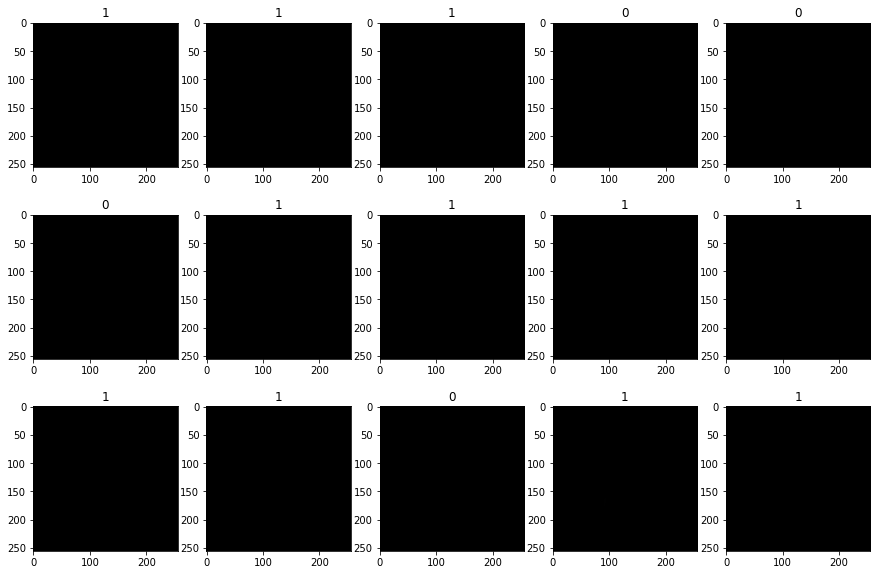

In [19]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten()

for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x, y: (x/255, y))
batch = data.as_numpy_iterator().next()

In [22]:
print(f"Min value {batch[0].min()}")
print(f"Max value {batch[0].max()}")
print(f"There are {len(data)} batches in our data")

Min value 0.0
Max value 1.0
There are 8 batches in our data


In [28]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2) +1
test_size = int(len(data)*0.2) +1

In [33]:
train = data.take(4)
val = data.skip(4).take(2)
test = data.skip(6).take(2)

4

# Define Model

In [77]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256, 256, 3)),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomRotation(0.2)])

model = Sequential([
    data_augmentation,
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(64, (5,5), 1, activation="relu", padding="same"),
    Conv2D(64, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation="relu", padding="same"),
    Conv2D(32, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

### Compile and fit Model

In [78]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy", "binary_accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      12832     
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 32)      25632     
                                                      

In [79]:
history = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
4/4 [==============================] - 2s 214ms/step - loss: 0.7343 - accuracy: 0.5781 - binary_accuracy: 0.5781 - val_loss: 0.6553 - val_accuracy: 0.5938 - val_binary_accuracy: 0.5938
Epoch 2/15
4/4 [==============================] - 1s 161ms/step - loss: 0.6743 - accuracy: 0.6016 - binary_accuracy: 0.6016 - val_loss: 0.6629 - val_accuracy: 0.6250 - val_binary_accuracy: 0.6250
Epoch 3/15
4/4 [==============================] - 1s 167ms/step - loss: 0.6543 - accuracy: 0.6641 - binary_accuracy: 0.6641 - val_loss: 0.6327 - val_accuracy: 0.6406 - val_binary_accuracy: 0.6406
Epoch 4/15
4/4 [==============================] - 1s 167ms/step - loss: 0.6613 - accuracy: 0.6328 - binary_accuracy: 0.6328 - val_loss: 0.5730 - val_accuracy: 0.6875 - val_binary_accuracy: 0.6875
Epoch 5/15
4/4 [==============================] - 1s 172ms/step - loss: 0.6366 - accuracy: 0.5938 - binary_accuracy: 0.5938 - val_loss: 0.6230 - val_accuracy: 0.7344 - val_binary_accuracy: 0.7344
Epoch 6/15
4/4 [====

In [67]:
batch = test.as_numpy_iterator().next()

In [80]:
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

res = []
pred = []
yhats = []
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    _y = 0 if yhat[0] <= 0.5 else 1
    pred.append(_y)
    yhats.append(yhat[0])
    res.append(y)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

print("Accuracy:", bin_acc.result().numpy(), "\nRecall:", recall.result().numpy(), "\nPrecision:", precision.result().numpy())

Accuracy: 0.7090517 
Recall: 0.7878788 
Precision: 0.7027027


In [75]:
pred = []
for _y in yhat:
    pred.append(1 if _y > 0.5 else 0)
print(np.array(pred))
print(y)

[0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0]
[0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1]


In [76]:
true = []
for i in range(len(pred)):
    if pred[i] == y[i]:
        true.append(1)
    else:
        true.append(0)
sum(true)

23

In [ ]:
img, label = batch[0][15], batch[1][15]
plt.imshow(img)
if label==1:
    plt.title("Brain with Tumor")
else:
    plt.title("Brain with No Tumor")
plt.show()